# Finding the heavy traffic indicators on I-94

![I-94 Figma Overview](i94_figma.png)



## Introduction
Interstate 94 is an east-west Interstate Highway in United States. In this project, we are going to analyze the data to **determine the key indicators of heavy traffic** on I-94. These indicators can be weather type, time of the day, etc.

## Dataset
The dataset we are using is from UCI Machine Learning Repository, it includes all the necessary details of traffic on I-94. The data is recorded by the station located between Minneapolis and Saint Paul, and only the traffic moving **from east to west** is recorded, but is sufficient enough for this analysis.

## Dataset Preprocessing

In [169]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [170]:
# load the dataset
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [171]:
# display the general information about the DataFrame
print("*" * 100)
print("General Information:")
print(df.info())
print("*" * 100)

# print the first and last 5 rows of the DataFrame
print("*" * 100)
print("First 5 rows:")
print(df.head())
print("*" * 100)

print("*" * 100)
print("Last 5 rows:")
print(df.tail())
print("*" * 100)

****************************************************************************************************
General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
****************************************************************************************************
****************************************************

There are several interesting observations about the dataset. First, it includes **9 columns** with different features, such as **numerical information like temperature, rain, and snow**, as well as **descriptive information like weather description**. The "holiday" column indicates **whether a day is a holiday**; only 61 entries are non-null, which means there are only 61 holidays in the dataset.

## Dataset Exploration

Let's start by visualize the disstribution of the traffic_volume column, because it is the direct related to the goal.

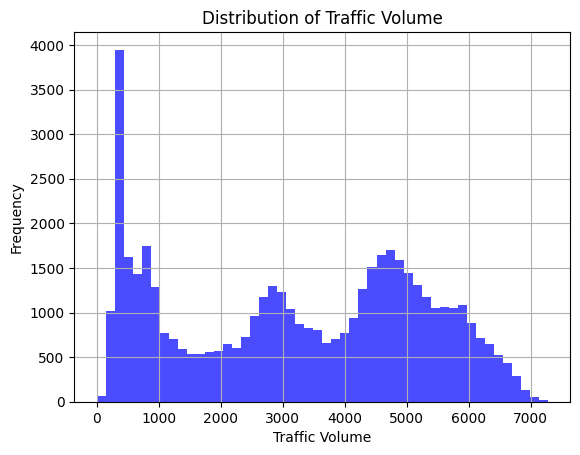

In [172]:
%matplotlib inline

# plot the traffic volume over time
df['traffic_volume'].hist(bins=50, alpha=0.7, color='blue')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Traffic Volume')
plt.show()

By observing the frequency histogram, it can be seen that traffic volumes around **500** are **the most frequent**, followed by traffic volumes around **4700** and **2800**.

Then let's dive into the column by finding the insight of its **statistics** knowledge.

In [173]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The statistics description shows the **mean** of traffic volume is around **3260**, and **75%** of the traffic volume is less than or equal to **4933**.

About **25%** of the time, there were **1,193** cars on the road - this is possibly because **the road is under construction or the time is late**. 

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: **comparing daytime data and nighttime data**.

We will start by dividing the dataset into two parts:
- **Daytime data**: hours from 7 a.m. to 7 p.m. (12 hours)
- **Nighttime data**: hours from 7 p.m. to 7 a.m. (12 hours)

### Traffic Volume: Day vs. Night

In [174]:
# transform the 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['daytime'] = df['hour'].apply(lambda x: 'Daytime' if 7 <= x <= 19 else 'Nighttime')

# split the dataset into daytime and nighttime
daytime_df = df[df['daytime'] == 'Daytime'].copy() # copy to avoid SettingWithCopyWarning
nighttime_df = df[df['daytime'] == 'Nighttime'].copy()

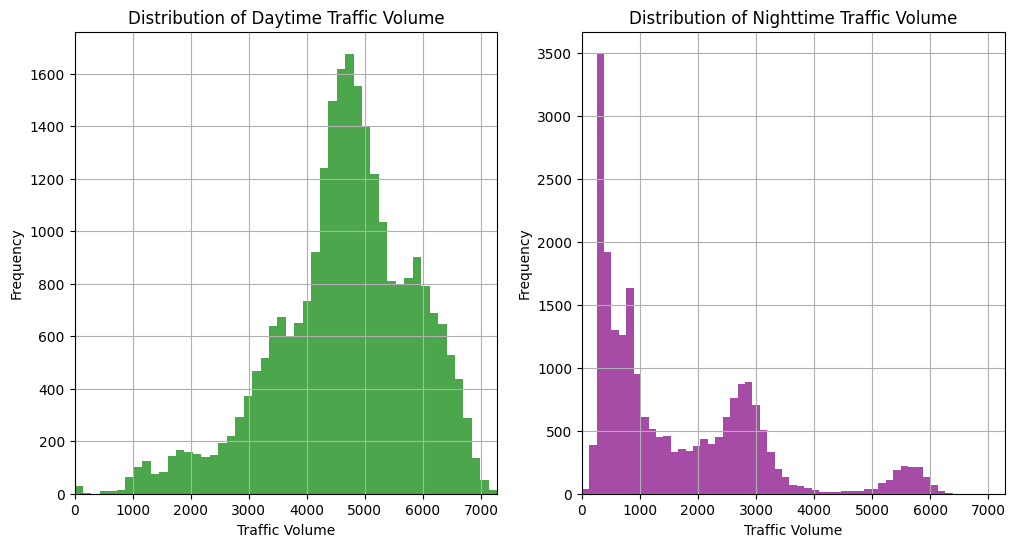

In [175]:
# set the same limits for both axes
min_val = df['traffic_volume'].min()
max_val = df['traffic_volume'].max()

# daytime traffic volume frequency distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
daytime_df['traffic_volume'].hist(bins=50, alpha=0.7, color='green')
plt.xlim(min_val, max_val)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Daytime Traffic Volume')

# nighttime traffic volume frequency distribution
plt.subplot(1, 2, 2)
nighttime_df['traffic_volume'].hist(bins=50, alpha=0.7, color='purple')
plt.xlim(min_val, max_val)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Nighttime Traffic Volume')
plt.show()

The **daytime histogram** is **right-skewed** with most values on the higher end, and the **nighttime** hisgoram is a **multimodal distribution** with **three peaks**.

The daytime traffic volume histogram shows a strong peak around **4500** vehicles, indicating that high traffic is most common during the day, likely due to work and school commutes. In contrast, the nighttime histogram has its highest frequencies at much lower volumes, around **400**, with a smaller **secondary peak** near **2800**. This suggests that traffic is generally much lighter at night, with only occasional moderate increases, possibly due to late events or shift changes. **Overall, traffic volume is significantly higher and more concentrated during daytime hours compared to nighttime.**

Because traffic is light at night, there isn't a heavy traffic problem, **thus we shouldn't use the nighttime data**.

### Time Indicators (Month)
One of the possible indicators of heavy traffic is **time**. There might be more people on the road in **a certain month, on a certain day, or at a certain time of the day**. We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- **Month**
- **Day of the week**
- **Time of day**

In [176]:
# calculate the average traffic volume by month for daytime traffic only
daytime_df['month'] = daytime_df['date_time'].dt.month
by_month = daytime_df.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

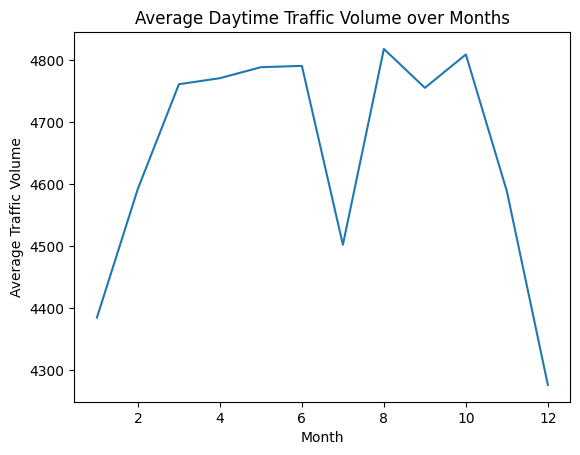

In [177]:
plt.plot(by_month.index, by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.title('Average Daytime Traffic Volume over Months')
plt.show()

Several observations can be seen from the above line chart:

- Traffic volume generally **increases** from January and reaches a **high and steady level** from March to June.
- There is a noticeable **dip** in July, followed by a **sharp increase** in August.
- The **highest average** traffic volumes occur in August and October.
- Traffic volume **drops significantly** in November and reaches its **lowest point** in December.

### Time Indicators (Day of the Week)
In the above section, we analyzed how traffic volume changes over the year. Now, we can continue with another time unit: **the day of the week**.

To get the traffic volume for each day of the week, we group the data by the weekday. so we first extract the new column as the day of the week.

In [178]:
# calculate the average traffic volume in each day of the week
daytime_df['day_of_week'] = daytime_df['date_time'].dt.dayofweek
by_day_of_week = daytime_df.groupby('day_of_week').mean(numeric_only=True)
by_day_of_week['traffic_volume']

day_of_week
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Average Daytime Traffic Volume by Day of Week')

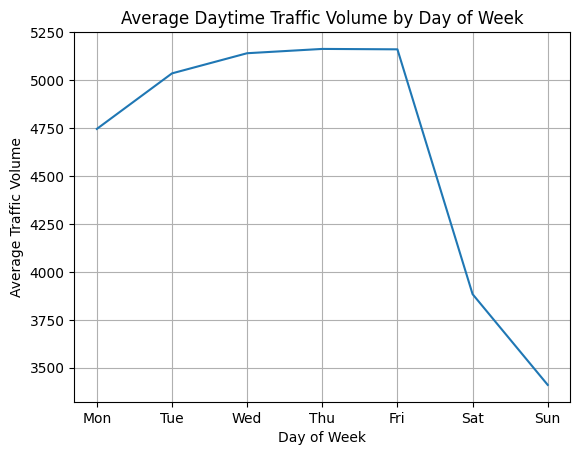

In [179]:
plt.plot(by_day_of_week.index, by_day_of_week['traffic_volume'])
plt.xlabel('Day of Week')
plt.xticks(by_day_of_week.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid()
plt.ylabel('Average Traffic Volume')
plt.title('Average Daytime Traffic Volume by Day of Week')

It can be seen from the above line plot:
- The average traffic volume is **highest on Wednesdays, Thursdays, and Fridays**, peaking slightly on Thursday.
- **Monday and Tuesday** also have high traffic, but slightly less than midweek.
- There is a **sharp drop** in traffic volume on **Saturday**, and the **lowest point** is reached on **Sunday**.

There is a significant difference between business days and the weekend, probably caused by **commuting**.


### Time Indicators (Time of Day)
In the previous section, we found that the traffic volume is significantly heavier on business days compared to the weekends. Now, let's move on to the next potential indicator — **Time of Day**.

To analyze how traffic volume changes throughout the day, we will group the daytime data by the hour and calculate the average traffic volume for each hour. This will help us identify the hours with the heaviest traffic.

The **weekends** should be **separated** from **business days** because people's habits change on weekends.

In [180]:
# calculate the average traffic volume by time of day
daytime_df['time_of_day'] = daytime_df['date_time'].dt.hour

# seperate the weenkends from weekdays
business_days = daytime_df[daytime_df['day_of_week'] < 5].copy()
weekend_days = daytime_df[daytime_df['day_of_week'] >= 5].copy()

by_time_of_business_day = business_days.groupby('time_of_day').mean(numeric_only=True)
by_time_of_weekend = weekend_days.groupby('time_of_day').mean(numeric_only=True)

print(by_time_of_business_day['traffic_volume'])
print(by_time_of_weekend['traffic_volume'])

time_of_day
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
time_of_day
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


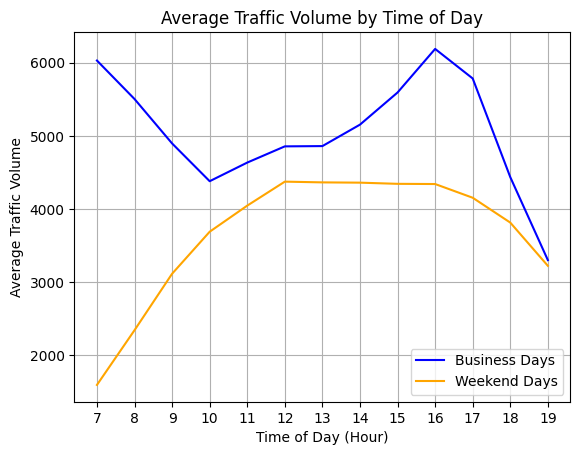

In [183]:
plt.plot(by_time_of_business_day.index, by_time_of_business_day['traffic_volume'], label='Business Days', color='blue')
plt.plot(by_time_of_weekend.index, by_time_of_weekend['traffic_volume'], label='Weekend Days', color='orange')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Time of Day')
plt.xticks(range(7, 20, 1))
plt.legend()
plt.grid()
plt.show()

The line chart suggests that:
- Traffic volume is **consistently higher** on **business days** than on **weekends**.
- On **business days**, traffic volume starts **high** at 7 a.m., **decreases** until 10 a.m., then **rises** again to a **peak** around 5 p.m., before **dropping** sharply after 6 p.m.
- On weekends, traffic volume gradually **increases** from 7 a.m., **peaks** around noon to 4 p.m., and then **decreases** towards the evening.

Recall that we have three indicators of heavy traffic:

- **Month:** Traffic volume is generally higher from **March to June** and **August to October**, as seen in the monthly averages.
- **Day of Week:** **Weekdays** have significantly higher traffic than weekends, with the **midweek (Wednesday to Friday)** being the busiest.
- **Time of Day:** On business days, traffic **starts high at 7 a.m.**, decreases until around 10 a.m., then rises again to a **peak around 4–6 p.m.**, before dropping sharply after 6 p.m. Weekends show a more gradual increase and lower overall volumes.

<span style="color:red">*In conclusion: These patterns suggest that the **heaviest traffic** occurs during weekday mornings and late afternoons in the spring and fall months.*</span>